In [2]:
import pandas as pd
import numpy as np
from numpy import nan

In [3]:
#Read the initial dataset
nhanes = pd.read_csv(r"C:\Users\bhara\Downloads\Nhanes (1).csv", low_memory=False)

In [4]:
nhanes

,SEQN,LBXTC,LBDTCSI,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,...,SLQ040,SLQ120,SLQ320,SLQ330,SLD013,WTSAF2YR,LBXGLU,LBDGLUSI,PHAFSTHR,PHAFSTMN
0,73557,167.0,4.32,8,Both interviewed and MEC examined,Male,69,NaN,Non-Hispanic Black,Non-Hispanic Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,170.0,4.40,8,Both interviewed and MEC examined,Male,54,NaN,Non-Hispanic White,Non-Hispanic White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73559,126.0,3.26,8,Both interviewed and MEC examined,Male,72,NaN,Non-Hispanic White,Non-Hispanic White,...,NaN,NaN,NaN,NaN,NaN,142196.890197,193.0,10.713,15.0,51.0
3,73560,168.0,4.34,8,Both interviewed and MEC examined,Male,9,NaN,Non-Hispanic White,Non-Hispanic White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,201.0,5.20,8,Both interviewed and MEC examined,Female,73,NaN,Non-Hispanic White,Non-Hispanic White,...,NaN,NaN,NaN,NaN,NaN,142266.006548,107.0,5.940,14.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,83726,NaN,NaN,8,Both interviewed and MEC examined,Male,40,NaN,Mexican American,Mexican American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8287,83727,190.0,4.91,8,Both interviewed and MEC examined,Male,26,NaN,Other Hispanic,Other Hispanic,...,NaN,NaN,NaN,NaN,NaN,67775.162806,108.0,5.995,14.0,30.0
8288,83729,152.0,3.93,8,Both interviewed and MEC examined,Female,42,NaN,Non-Hispanic Black,Non-Hispanic Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8289,83730,167.0,4.32,8,Both interviewed and MEC examined,Male,7,NaN,Other Hispanic,Other Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Choose important predictors and preprocess them
y = nhanes['LBXTC']
y.fillna(y.mean(), inplace=True)

In [6]:
gender = nhanes['RIAGENDR']
gender = gender.replace({"Female": 1, "Male": 0})
gender.fillna(gender.mean(), inplace=True)

In [7]:
race = nhanes['RIDRETH3']
race = race.replace({"Mexican American": 0, "Other Hispanic": 1, "Non-Hispanic White": 2, "Non-Hispanic Black": 3, "Non-Hispanic Asian": 4, "Other Race - Including Multi-Racial": 5})
race.fillna(race.mean(), inplace=True)

In [8]:
age = nhanes['RIDAGEYR']
age.fillna(age.mean(), inplace=True)

In [9]:
weight = nhanes['BMXWT']
weight.fillna(weight.mean(), inplace=True)

In [10]:
bmi = nhanes['BMXBMI']
bmi.fillna(bmi.mean(), inplace=True)

In [11]:
alcohol = nhanes['ALQ130']
alcohol.fillna(alcohol.mean(), inplace=True)

In [12]:
diabetes = nhanes['DIQ010']
diabetes = diabetes.replace({"Yes": 1, "No": 0, "Refused": 3, "Don't know": 4, "Borderline": 5})
diabetes.fillna(diabetes.mean(), inplace=True)
possible_diabetes = nhanes['DIQ170']
possible_diabetes = possible_diabetes.replace({"Yes": 1, "No": 0, "Refused": 3, "Don't know": 4})
possible_diabetes.fillna(possible_diabetes.mean(), inplace=True)

In [13]:
moderate_activity = nhanes['PAQ670']
moderate_activity.fillna(moderate_activity.mean(), inplace=True)
vigorous_activity = nhanes['PAQ655']
vigorous_activity.fillna(vigorous_activity.mean(), inplace=True)

In [14]:
bps = nhanes['BPXSY3']
bps.fillna(bps.mean(), inplace=True)
bpd = nhanes['BPXDI3']
bpd.fillna(bpd.mean(), inplace=True)

In [15]:
sleep = nhanes['SLD010H']
sleep.fillna(sleep.mean(), inplace=True)

In [16]:
income_to_poverty = nhanes['INDFMPIR']
income_to_poverty.fillna(income_to_poverty.mean(), inplace=True)

In [17]:
military_service = nhanes['DMQMILIZ']
military_service = military_service.replace({"Yes": 1, "No": 0, "Refused": 2})
military_service.fillna(military_service.mean(), inplace=True)

In [18]:
served_in_foreign = nhanes['DMQADFC']
served_in_foreign = served_in_foreign.replace({"Yes": 1, "No": 0, "Refused": 2, "Don't Know": 3})
served_in_foreign.fillna(served_in_foreign.mean(), inplace=True)

In [19]:
pregnancy_status = nhanes['RIDEXPRG']
pregnancy_status = pregnancy_status.replace({"Yes, positive lab pregnancy test or self-reported pregnant at exam": 1, "The participant was not pregnant at exam": 0, "Cannot ascertain if the participant is pregnant at exam": 2})
pregnancy_status.fillna(pregnancy_status.mean(), inplace=True)

In [20]:
no_pp_hh = nhanes['DMDHHSIZ']
no_pp_hh = no_pp_hh.replace({"7 or more people in the Household": 7})
no_pp_hh = no_pp_hh.astype(float)
no_pp_hh.fillna(no_pp_hh.mean(), inplace=True)

In [21]:
salt_use = nhanes['DBD100']
salt_use = salt_use.replace({"Rarely": 0, "Occasionally": 1, "Very often": 2, "Don't know": 3})
salt_use.fillna(salt_use.mean(), inplace=True)

In [22]:
salt_type = nhanes['DBQ095Z']
salt_type = salt_type.replace({"Ordinary salt [includes regular iodized salt, sea salt and seasoning salts made with regular salt]": 0, "Lite salt": 1, "Salt substitute": 2, "Doesn't use or add salt products at the table": 3, "Don't know": 4})
salt_type.fillna(salt_type.mean(), inplace=True)

In [23]:
carbs = nhanes['DR1TCARB']
carbs.fillna(carbs.mean(), inplace=True)

In [24]:
fats = nhanes['DR1TTFAT']
fats.fillna(fats.mean(), inplace=True)

In [25]:
sat_fat = nhanes['DR1TSFAT']
sat_fat.fillna(sat_fat.mean(), inplace=True)

In [26]:
monosat_fat = nhanes['DR1TMFAT']
monosat_fat.fillna(monosat_fat.mean(), inplace=True)

In [27]:
polyunsat_fat = nhanes['DR1TPFAT']
polyunsat_fat.fillna(polyunsat_fat.mean(), inplace=True)

In [28]:
vitamin_d = nhanes['DR1TVD']
vitamin_d.fillna(vitamin_d.mean(), inplace=True)

In [29]:
beta_carotene = nhanes['DR1TBCAR']
beta_carotene.fillna(beta_carotene.mean(), inplace=True)

In [30]:
beta_cryptoxanthin =nhanes['DR1TCRYP']
beta_cryptoxanthin.fillna(beta_cryptoxanthin.mean(), inplace=True)

In [31]:
#Fit all the preprocessed predictors into a dataframe
X = pd.DataFrame({'gender': gender, 'age': age, 'race': race, 'bmi': bmi, 'bps': bps, 'bpd': bpd, 'alcohol': alcohol, 'diabetes': diabetes, "possible_diabetes": possible_diabetes, "mod_act": moderate_activity, "vig_act": vigorous_activity, "sleep": sleep, "income_to_poverty": income_to_poverty, "military_service": military_service, "served_in_foreign": served_in_foreign, "pregnancy_status": pregnancy_status, "no_pp_hh": no_pp_hh, "salt_use": salt_use, "salt_type": salt_type, "carbs": carbs, "sat_fat": sat_fat, "monosat_fat": monosat_fat, "polyunsat_fat": polyunsat_fat, "vitamin_d": vitamin_d,  "beta_carotene": beta_carotene, "beta_cryptoxanthin": beta_cryptoxanthin})
X

,gender,age,race,bmi,bps,bpd,alcohol,diabetes,possible_diabetes,mod_act,...,no_pp_hh,salt_use,salt_type,carbs,sat_fat,monosat_fat,polyunsat_fat,vitamin_d,beta_carotene,beta_cryptoxanthin
0,0,69,3,26.7,102.00000,74.000000,1.000000,1,0.148036,3.634963,...,3.0,1.000000,2.000000,239.590000,17.819000,18.493000,8.829000,3.300000,304.000000,278.000000
1,0,54,2,28.6,156.00000,42.000000,4.000000,1,0.148036,3.634963,...,4.0,1.000000,0.000000,423.780000,53.408000,35.481000,20.505000,15.200000,145.000000,12.000000
2,0,72,2,28.9,146.00000,80.000000,3.511123,1,0.148036,1.000000,...,2.0,0.000000,0.000000,224.390000,25.263000,20.902000,12.953000,4.000000,449.000000,35.000000
3,0,9,2,17.1,104.00000,38.000000,3.511123,0,0.148036,3.634963,...,4.0,0.000000,0.000000,162.920000,23.511000,16.986000,9.617000,9.900000,237.000000,223.000000
4,1,73,2,19.7,142.00000,86.000000,3.511123,0,0.000000,3.634963,...,2.0,0.666995,3.000000,178.200000,4.479000,26.216000,1.263000,23.500000,1476.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,0,40,0,26.8,117.99946,65.035637,3.511123,0,0.000000,3.634963,...,2.0,0.666995,1.037594,253.928386,25.827773,27.411315,18.524012,4.712882,1927.058051,85.973613
8287,0,26,1,24.5,112.00000,76.000000,3.000000,0,0.000000,3.634963,...,5.0,0.000000,0.000000,494.540000,80.414000,57.943000,30.600000,14.700000,1068.000000,198.000000
8288,1,42,3,34.0,138.00000,80.000000,3.511123,0,0.000000,3.000000,...,1.0,0.666995,3.000000,290.370000,29.372000,33.540000,37.623000,14.200000,5648.000000,38.000000
8289,0,7,1,16.1,117.99946,65.035637,3.511123,0,0.148036,3.634963,...,4.0,0.666995,1.037594,253.928386,25.827773,27.411315,18.524012,4.712882,1927.058051,85.973613


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [69]:
#Standardize the dataset, split into train-test split 
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [70]:
#Use cross-validation to identify best hyperparameter for regularization strength
alpha = np.arange(0.5,1001,0.5)
alphas = [i for i in alpha]  
model_lcv = LassoCV(alphas=alphas, cv=5)  
pred_lcv = model_lcv.fit(X_train, y_train)
best_alphal = model_lcv.alpha_

In [73]:
#Fit Lasso model with the hyperparameter
modell = Lasso(alpha=best_alphal)
modell.fit(X_train, y_train)
pred_l = modell.predict(X_test)

In [74]:
#Print variables selected by Lasso
selected_variables = np.where(modell.coef_ != 0)[0]
X_var = ['gender', 'age', 'race', 'bmi', 'bps', 'bpd', 'alcohol', 'diabetes', 'possible_diabetes', 'mod_act', 'vig_act', 'sleep', 'income_to_poverty', 'military_service', 'served_in_foreign', 'pregnancy_status', 'no_pp_hh', 'salt_use', 'salt_type', 'carbs', 'sat_fat', 'monosat_fat', 'polyunsat_fat', 'vitamin_d', 'beta_carotene', 'beta_cryptoxanthin']
selected_variable_names = [X_var[i] for i in selected_variables]
print("Selected variables indices:", selected_variables)
print("Selected variable names:", selected_variable_names)

Selected variables indices: [ 0  1  3  4  5  7  8  9 11 12 13 15 17 19 21 22 24 25]
Selected variable names: ['gender', 'age', 'bmi', 'bps', 'bpd', 'diabetes', 'possible_diabetes', 'mod_act', 'sleep', 'income_to_poverty', 'military_service', 'pregnancy_status', 'salt_use', 'carbs', 'monosat_fat', 'polyunsat_fat', 'beta_carotene', 'beta_cryptoxanthin']


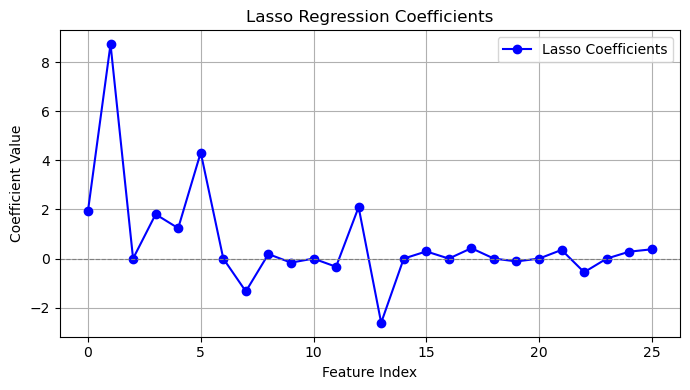

In [75]:
#Plot of variable v/s coefficient
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(range(len(modell.coef_)), modell.coef_, marker='o', linestyle='-', color='b', label='Lasso Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients'.format(best_alphal, msel))
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
#Classify cholestrol levels into 3 classes; Normal, Borderline and High
threshold1 = 200
threshold2 = 239

def classify(value):
    if value < threshold1:
        return 0
    elif value >= threshold1 and value <= threshold2:
        return 1
    else:
        return 2
        
y_c = y.apply(classify)
y_c

0       0
1       0
2       0
3       0
4       1
       ..
8286    0
8287    0
8288    0
8289    0
8290    0
Name: LBXTC, Length: 8291, dtype: int64

In [77]:
#Split data into training and test sets 
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_std, y_c, test_size=0.2, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [79]:
#Fit Logistic regression and calculate accuracy
model_lr = LogisticRegression()
model_lr.fit(X_train_c, y_train_c)
pred_lr = model_lr.predict(X_test_c)
accuracy = accuracy_score(y_test_c, pred_lr)
accuracy

0.7203134418324292

In [80]:
#Make a new dataset using only the variables Lasso with cross-validation chooses
X_lasso = pd.DataFrame({'gender': gender, 'age': age, 'bmi': bmi, 'bps': bps, 'bpd': bpd, 'diabetes': diabetes, "possible_diabetes": possible_diabetes, "mod_act": moderate_activity, "sleep": sleep, "income_to_poverty": income_to_poverty, "military_service": military_service, "pregnancy_status": pregnancy_status, "salt_use": salt_use, "carbs": carbs, "monosat_fat": monosat_fat, "polyunsat_fat": polyunsat_fat,  "beta_carotene": beta_carotene, "beta_cryptoxanthin": beta_cryptoxanthin})
X_lasso

,gender,age,bmi,bps,bpd,diabetes,possible_diabetes,mod_act,sleep,income_to_poverty,military_service,pregnancy_status,salt_use,carbs,monosat_fat,polyunsat_fat,beta_carotene,beta_cryptoxanthin
0,0,69,26.7,102.00000,74.000000,1,0.148036,3.634963,7.000000,0.840000,1.000000,0.12599,1.000000,239.590000,18.493000,8.829000,304.000000,278.000000
1,0,54,28.6,156.00000,42.000000,1,0.148036,3.634963,9.000000,1.780000,0.000000,0.12599,1.000000,423.780000,35.481000,20.505000,145.000000,12.000000
2,0,72,28.9,146.00000,80.000000,1,0.148036,1.000000,8.000000,4.510000,1.000000,0.12599,0.000000,224.390000,20.902000,12.953000,449.000000,35.000000
3,0,9,17.1,104.00000,38.000000,0,0.148036,3.634963,7.037362,2.520000,0.086548,0.12599,0.000000,162.920000,16.986000,9.617000,237.000000,223.000000
4,1,73,19.7,142.00000,86.000000,0,0.000000,3.634963,9.000000,5.000000,0.000000,0.12599,0.666995,178.200000,26.216000,1.263000,1476.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8286,0,40,26.8,117.99946,65.035637,0,0.000000,3.634963,8.000000,3.810000,0.000000,0.12599,0.666995,253.928386,27.411315,18.524012,1927.058051,85.973613
8287,0,26,24.5,112.00000,76.000000,0,0.000000,3.634963,7.000000,2.320731,0.000000,0.12599,0.000000,494.540000,57.943000,30.600000,1068.000000,198.000000
8288,1,42,34.0,138.00000,80.000000,0,0.000000,3.000000,7.000000,3.660000,0.000000,0.00000,0.666995,290.370000,33.540000,37.623000,5648.000000,38.000000
8289,0,7,16.1,117.99946,65.035637,0,0.148036,3.634963,7.037362,1.050000,0.086548,0.12599,0.666995,253.928386,27.411315,18.524012,1927.058051,85.973613


In [81]:
threshold1 = 200
threshold2 = 239

def classify(value):
    if value < threshold1:
        return 0
    elif value >= threshold1 and value <= threshold2:
        return 1
    else:
        return 2
        
y_c_lasso = y.apply(classify)
y_c_lasso

0       0
1       0
2       0
3       0
4       1
       ..
8286    0
8287    0
8288    0
8289    0
8290    0
Name: LBXTC, Length: 8291, dtype: int64

In [84]:
#Standardize the data of the new model and split into training and test sets
scaler = StandardScaler()
X_std_lasso = pd.DataFrame(scaler.fit_transform(X_lasso), columns=X_lasso.columns)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_std_lasso, y_c_lasso, test_size=0.2, random_state=42)

In [85]:
#Fit Logistic regression model with the new model made using just the predictors chosen by cross-validated Lasso regression
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model_lr_lasso = LogisticRegression(solver='lbfgs', max_iter=1000)
    model_lr_lasso.fit(X_train_lasso, y_train_lasso)
    pred_lr_lasso = model_lr_lasso.predict(X_test_lasso)
    accuracy = accuracy_score(y_test_lasso, pred_lr_lasso)
accuracy

0.7215189873417721